<a href="https://colab.research.google.com/github/Mgobeaalcoba/Exploration_Data_Analyst/blob/main/shipment_analitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import altair as alt

In [2]:
dir_pandas = '/content/drive/My Drive/Colab Notebooks/db/{}'
dir_pandas

'/content/drive/My Drive/Colab Notebooks/db/{}'

In [3]:
from google.colab import drive # Codigo para poder acceder al contenido de nuestro google drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv(dir_pandas.format('base para EDA de shipment en Python.csv'))

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Shipment ID,Inbound ID,Truck ID,Outbound ID,Dispatch ID,Date Created,NFE,Hub Status,Reject Reason,Inbound Date Opened,Inbound Date Included,Inbound Date Closed,Inbound Carrier Name,Inbound User ID,Inbound Dock ID,Labeling Date Printed,Labeling Authorization Date,Labeling Last Print User,Labeling Workstation ID,Weight,Height,Length,Width,Labeling Carrier Name,Labeling Service Id,Labeling Service Name,Labeling Zone,Tracking Number,Outbound Date Opened,Outbound Included Date,Outbound Date Closed,Outbound User IDs,Outbound Added By,Outbound Position,Dispatch Included Date,Dispatch Date Finished,Dispatch Truck ID,Dispatch User ID,Dispatch Dock ID,Priority,Process Type,Seller ID,Buyer ID,Divergence,LastMile,LastMile Reimpressão,InBuffer,InBuffer Name,InBuffer Promise EDT,InBuffer Promise Shipping,Arrived LastMile,Arrived Npym,Was Reauthorized,Cutoff,Start Priorization,End Priorization,Arrival Logistic Type,Arrival Tracking Number,Status Description
0,41172004555,8057b2ed-c41a-421d-9de0-d0487c08ec69,frv789,2.231752e+15,2.231774e+15,10/02/2022 10:33:00,NaN,dispatched,NaN,10/02/2022 18:34:51,10/02/2022 18:46:21,10/02/2022 18:57:22,Promail SRL,ME.AR.DAALMADA552(125526),4014,NaN,10/02/2022 18:46:21,NaN,0,5270.0,44.0,56.0,48.0,OCASA,351,Prioritario,ocs064,EC2DC27336839,10/02/2022 19:00:45,10/02/2022 19:18:01,10/02/2022 19:42:48,"[ME.AR.JORAMOS184(220216), ME.AR.JORAMOS184(22...",ME.AR.JORAMOS184(220216),XMC1,11/02/2022 00:50:48,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311,True,NPyM,326130908,282727675,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,xd_drop_off,NaN,shipped
1,41171687207,e3994e97-7f04-4a69-8283-ea64cf677c5a,ab902rw,2.231760e+15,2.231774e+15,10/02/2022 14:27:31,NaN,dispatched,NaN,10/02/2022 19:24:26,10/02/2022 19:28:10,10/02/2022 19:41:42,IFLOW SA,ME.AR.JESQUIVEL(97833),1012,NaN,10/02/2022 19:28:10,NaN,0,1000.0,20.0,17.0,15.0,OCASA,351,Prioritario,ocs064,EC2CX27335603,10/02/2022 20:42:06,10/02/2022 20:51:12,10/02/2022 21:39:11,"[ME.AR.WLOPEZ(97889), ME.AR.WLOPEZ(97889)]",ME.AR.WLOPEZ(97889),PMA12,11/02/2022 00:50:52,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311,True,NPyM,62342535,113368681,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
2,41172194371,0b6fe5f5-8b77-4699-9da0-b70225974f67,kni384,2.231760e+15,2.231774e+15,10/02/2022 12:40:00,NaN,dispatched,NaN,10/02/2022 19:49:45,10/02/2022 19:57:06,10/02/2022 20:00:22,punto hop,ME.AR.FBISUARAJOR(219086),1009,NaN,10/02/2022 19:57:08,NaN,0,700.0,11.0,46.0,37.0,OCASA,351,Prioritario,ocs064,EC2CX27340866,10/02/2022 20:42:06,10/02/2022 20:45:41,10/02/2022 21:39:11,"[ME.AR.WLOPEZ(97889), ME.AR.WLOPEZ(97889)]",ME.AR.WLOPEZ(97889),PMA12,11/02/2022 00:50:51,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311,True,NPyM,18517088,331643959,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,xd_drop_off,NaN,shipped
3,41171906821,bb52be23-e328-4531-a568-384266865fbf,ikc507,2.231752e+15,2.231774e+15,10/02/2022 10:09:56,NaN,dispatched,NaN,10/02/2022 17:29:12,10/02/2022 17:58:53,10/02/2022 18:06:22,OCASA Logistics,ME.AR.JOSANCHEZ403(97840),4018,NaN,10/02/2022 17:58:54,NaN,0,100.0,7.0,12.0,12.0,OCASA,351,Prioritario,ocs065,EC2XF27334605,10/02/2022 19:00:43,10/02/2022 20:12:33,10/02/2022 21:38:44,"[ME.AR.MPALOMO(220245), ME.AR.GLAGOMARCINO(205...",ME.AR.GLAGOMARCINO(205971),PMA15,11/02/2022 00:50:49,11/02/2022 00:50:40,Iue986,ME.AR.CFLORES(113895),25311,True,NPyM,63214057,8120912,False,True,False,False,none,0.0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,xd_drop_off,NaN,shipped
4,41172154927,17432604-e1b4-4499-9c28-e44b42c9ef7b,feb362,2.231765e+15,2.231774e+15,10/02/2022 09:13:28,NaN,dispatched,NaN,10/02/2022 20:32:22,10/02/2022 20:37:04,10/02/2022 20:50:56,punto hop,ME.AR.LAVALOS(97761),4018,NaN,10/02/2022 22:40:07,NaN,0,1000.0,10.0,10.0,10.0,OCASA,351,Prioritario,ocs064,EC2FE27340

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98411 entries, 0 to 98410
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Shipment ID                  98411 non-null  int64  
 1   Inbound ID                   98411 non-null  object 
 2   Truck ID                     98411 non-null  object 
 3   Outbound ID                  97953 non-null  float64
 4   Dispatch ID                  79050 non-null  float64
 5   Date Created                 98411 non-null  object 
 6   NFE                          0 non-null      float64
 7   Hub Status                   98411 non-null  object 
 8   Reject Reason                54 non-null     object 
 9   Inbound Date Opened          98411 non-null  object 
 10  Inbound Date Included        98411 non-null  object 
 11  Inbound Date Closed          97049 non-null  object 
 12  Inbound Carrier Name         98411 non-null  object 
 13  Inbound User ID 

In [6]:
df.shape

(98411, 59)

In [7]:
df['Inbound Date Included'] = df['Inbound Date Included'].apply(lambda x : pd.to_datetime( x, errors = 'coerce', utc = True,))
df['Outbound Included Date'] = df['Outbound Included Date'].apply(lambda x : pd.to_datetime( x, errors = 'coerce', utc = True,))
df['Dispatch Date Finished'] = df['Dispatch Date Finished'].apply(lambda x : pd.to_datetime( x, errors = 'coerce', utc = True,))


In [9]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
# pd.options.display.float_format="{:,.1f}".format
# con el último tmb le agrego la coma como separador de mil

In [10]:
import matplotlib.pyplot as plt

In [11]:
agg_shp_by_in_carrier = df.groupby(["Arrival Logistic Type","Inbound Carrier Name"]).agg({'Shipment ID':['count']})
agg_shp_by_in_carrier

Shipment ID
                                                 count
Arrival Logistic Type Inbound Carrier Name            
cross_docking         Dropshipping SA              129
                      IFLOW SA                   25095
                      OCASA Logistics            15648
                      Promail SRL                   42
                      fastmail                      78
                      loginter                   14547
                      punto hop                    777
xd_drop_off           Dropshipping SA             6257
                      IFLOW SA                    4193
                      OCASA Logistics            15811
                      Promail SRL                 3021
                      fastmail                      43
                      loginter                     189
                      ocasa                        420
                      punto hop                  12114

In [12]:
agg_shp_by_in_carrier = agg_shp_by_in_carrier.reset_index()

agg_shp_by_in_carrier

,Arrival Logistic Type,Inbound Carrier Name,Shipment ID
,,,count
0,cross_docking,Dropshipping SA,129
1,cross_docking,IFLOW SA,25095
2,cross_docking,OCASA Logistics,15648
3,cross_docking,Promail SRL,42
4,cross_docking,fastmail,78
5,cross_docking,loginter,14547
6,cross_docking,punto hop,777
7,xd_drop_off,Dropshipping SA,6257
8,xd_drop_off,IFLOW SA,4193


In [13]:
agg_shp_by_in_carrier.columns

MultiIndex([('Arrival Logistic Type',      ''),
            ( 'Inbound Carrier Name',      ''),
            (          'Shipment ID', 'count')],
           )

In [14]:
columns = ['Arrival Logistic Type','Inbound Carrier Name','Shipment ID_count']
agg_shp_by_in_carrier.columns = columns
agg_shp_by_in_carrier.columns

Index(['Arrival Logistic Type', 'Inbound Carrier Name', 'Shipment ID_count'], dtype='object')

In [15]:
agg_shp_by_in_carrier

,Arrival Logistic Type,Inbound Carrier Name,Shipment ID_count
0,cross_docking,Dropshipping SA,129
1,cross_docking,IFLOW SA,25095
2,cross_docking,OCASA Logistics,15648
3,cross_docking,Promail SRL,42
4,cross_docking,fastmail,78
5,cross_docking,loginter,14547
6,cross_docking,punto hop,777
7,xd_drop_off,Dropshipping SA,6257
8,xd_drop_off,IFLOW SA,4193
9,xd_drop_off,OCASA Logistics,15811


In [44]:
alt.Chart(agg_shp_by_in_carrier).mark_bar().encode(
    x = 'Inbound Carrier Name',
    y = 'Shipment ID_count',
    color = 'Arrival Logistic Type'
).properties(width=500).interactive()

alt.Chart(...)

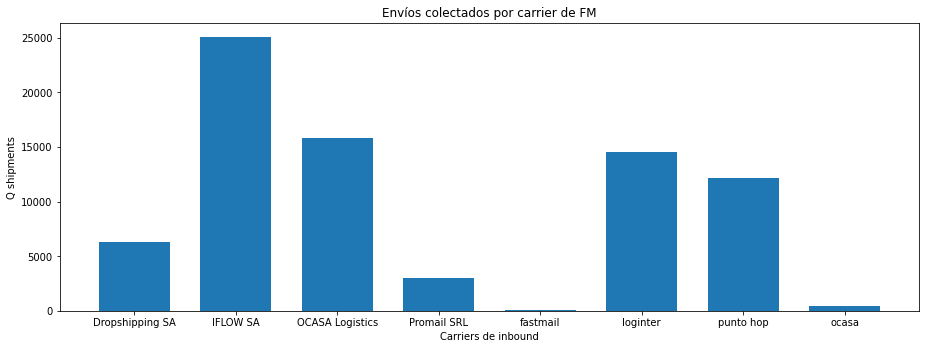

In [40]:
plt.bar(agg_shp_by_in_carrier['Inbound Carrier Name'],agg_shp_by_in_carrier['Shipment ID_count'],width=0.7,)
plt.grid()
plt.grid()
plt.xlabel("Carriers de inbound")
plt.ylabel("Q shipments")
plt.title("Envíos colectados por carrier de FM")
plt.subplots_adjust(left=0.01,
                    bottom=0.5, 
                    right=2, 
                    top=1.5, 
                    wspace=1, 
                    hspace=1)

In [23]:
df.columns

Index(['Shipment ID', 'Inbound ID', 'Truck ID', 'Outbound ID', 'Dispatch ID',
       'Date Created', 'NFE', 'Hub Status', 'Reject Reason',
       'Inbound Date Opened', 'Inbound Date Included', 'Inbound Date Closed',
       'Inbound Carrier Name', 'Inbound User ID', 'Inbound Dock ID',
       'Labeling Date Printed', 'Labeling Authorization Date',
       'Labeling Last Print User', 'Labeling Workstation ID', 'Weight',
       'Height', 'Length', 'Width', 'Labeling Carrier Name',
       'Labeling Service Id', 'Labeling Service Name', 'Labeling Zone',
       'Tracking Number', 'Outbound Date Opened', 'Outbound Included Date',
       'Outbound Date Closed', 'Outbound User IDs', 'Outbound Added By',
       'Outbound Position', 'Dispatch Included Date', 'Dispatch Date Finished',
       'Dispatch Truck ID', 'Dispatch User ID', 'Dispatch Dock ID', 'Priority',
       'Process Type', 'Seller ID', 'Buyer ID', 'Divergence', 'LastMile',
       'LastMile Reimpressão', 'InBuffer', 'InBuffer Name',
   

In [24]:
agg_shp_by_hu = df.groupby(['Labeling Carrier Name','Outbound ID']).agg({'Shipment ID' : 'count'})
agg_shp_by_hu = agg_shp_by_hu.reset_index()
agg_shp_by_hu

,Labeling Carrier Name,Outbound ID,Shipment ID
0,Andreani,22317391334366,360
1,Andreani,22317700334270,304
2,Andreani,22317744486813,19
3,Andreani,22317860648344,1
4,Andreani,223166861979268,1
...,...,...,...
1079,Webpack,2231776973384690,1
1080,Webpack,2231776998102813,1
1081,Webpack,2231778597616931,7
1082,Webpack,2231779066814869,8


In [31]:
agg_shp_by_hu = agg_shp_by_hu[agg_shp_by_hu['Shipment ID'] > 5] # Filtro los bultos para calcular SPP
agg_shp_by_hu

,Labeling Carrier Name,Outbound ID,Shipment ID
0,Andreani,22317391334366,360
1,Andreani,22317700334270,304
2,Andreani,22317744486813,19
5,Andreani,223173728359439,44
6,Andreani,223174253163780,42
...,...,...,...
1074,Webpack,2231769380959636,28
1075,Webpack,2231770252258497,110
1076,Webpack,2231773930591027,106
1081,Webpack,2231778597616931,7


In [33]:
agg_spp_by_carrier = agg_shp_by_hu.groupby(['Labeling Carrier Name']).agg({'Shipment ID' : 'mean'})
agg_spp_by_carrier = agg_spp_by_carrier.reset_index()
agg_spp_by_carrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Labeling Carrier Name  8 non-null      object 
 1   Shipment ID            8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 256.0+ bytes


In [53]:
agg_spp_by_carrier = agg_spp_by_carrier.sort_values('Shipment ID', ascending=True)
agg_spp_by_carrier

,Labeling Carrier Name,Shipment ID
6,Urbano,96
0,Andreani,100
3,OCASA,100
7,Webpack,108
2,OCA,118
1,Correo Argentino,121
5,Reprocesos Carrito,149
4,Punto HOP,201


In [54]:
alt.Chart(agg_spp_by_carrier).mark_bar().encode(
    x = 'Labeling Carrier Name',
    y = 'Shipment ID'
).properties(width=500)

alt.Chart(...)

In [56]:
df.shape # Filas y columnas

(98411, 59)

In [57]:
df.size

5806249

In [58]:
agg_shp_by_hu.describe()

,Outbound ID,Shipment ID
count,881,881
mean,2024268016061661,111
std,615822262513712,137
min,2231770889514,6
25%,2231749209189726,26
50%,2231760181676923,39
75%,2231769779719140,149
max,2231788879211559,899


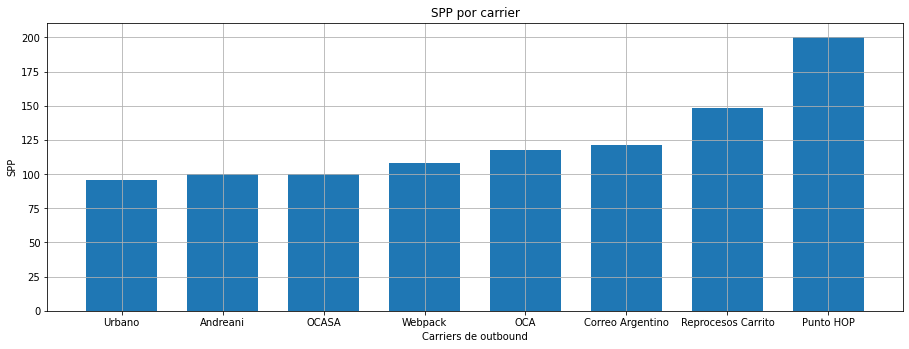

In [62]:
plt.bar(agg_spp_by_carrier['Labeling Carrier Name'],agg_spp_by_carrier['Shipment ID'],width=0.7,)
plt.grid()
plt.xlabel("Carriers de outbound")
plt.ylabel("SPP")
plt.title("SPP por carrier")
plt.subplots_adjust(left=0.02,
                    bottom=0.5, 
                    right=2, 
                    top=1.5, 
                    wspace=1, 
                    hspace=1)

In [63]:
df.columns

Index(['Shipment ID', 'Inbound ID', 'Truck ID', 'Outbound ID', 'Dispatch ID',
       'Date Created', 'NFE', 'Hub Status', 'Reject Reason',
       'Inbound Date Opened', 'Inbound Date Included', 'Inbound Date Closed',
       'Inbound Carrier Name', 'Inbound User ID', 'Inbound Dock ID',
       'Labeling Date Printed', 'Labeling Authorization Date',
       'Labeling Last Print User', 'Labeling Workstation ID', 'Weight',
       'Height', 'Length', 'Width', 'Labeling Carrier Name',
       'Labeling Service Id', 'Labeling Service Name', 'Labeling Zone',
       'Tracking Number', 'Outbound Date Opened', 'Outbound Included Date',
       'Outbound Date Closed', 'Outbound User IDs', 'Outbound Added By',
       'Outbound Position', 'Dispatch Included Date', 'Dispatch Date Finished',
       'Dispatch Truck ID', 'Dispatch User ID', 'Dispatch Dock ID', 'Priority',
       'Process Type', 'Seller ID', 'Buyer ID', 'Divergence', 'LastMile',
       'LastMile Reimpressão', 'InBuffer', 'InBuffer Name',
   

In [64]:
df_slice = df[['Shipment ID','Outbound ID','Dispatch ID','Inbound Date Included','Outbound Included Date','Dispatch Date Finished']]
df_slice

,Shipment ID,Outbound ID,Dispatch ID,Inbound Date Included,Outbound Included Date,Dispatch Date Finished
0,41172004555,2231751909309865,2231774370482667,2022-10-02 18:46:21+00:00,2022-10-02 19:18:01+00:00,2022-11-02 00:50:40+00:00
1,41171687207,2231760161503369,2231774370482667,2022-10-02 19:28:10+00:00,2022-10-02 20:51:12+00:00,2022-11-02 00:50:40+00:00
2,41172194371,2231760161503369,2231774370482667,2022-10-02 19:57:06+00:00,2022-10-02 20:45:41+00:00,2022-11-02 00:50:40+00:00
3,41171906821,2231751905856411,2231774370482667,2022-10-02 17:58:53+00:00,2022-10-02 20:12:33+00:00,2022-11-02 00:50:40+00:00
4,41172154927,2231765379297322,2231774370482667,2022-10-02 20:37:04+00:00,2022-10-02 22:54:17+00:00,2022-11-02 00:50:40+00:00
...,...,...,...,...,...,...
98406,41171135158,2231747426552153,2231786614731542,2022-10-02 17:28:20+00:00,2022-10-02 18:34:40+00:00,2022-11-02 02:38:20+00:00
98407,41171868489,2231746975836312,2231787668088065,2022-10-02 15:16:11+00:00,2022-10-02 18:18:51+00:00,2022-11-02 02:46:22+00:00
98408,41172266893,2231766009738620,2231781946935004,2022-10-02 21:19:14+00:00,2022-10-02 21:59:27+00:00,2022-11-02 01:41:49+00:00
98409,41171446188,223175993426690,2231787668088065,2022-10-02 19:43:04+00:00,2022-10-02 20:59:47+00:00,2022-11-02 02:46:22+00:00


In [85]:
slice_loginter_urb = df[(df['Inbound Carrier Name'] == 'loginter') & (df['Labeling Carrier Name'] == 'Urbano')]
mask = (slice_loginter_urb['Inbound Date Included'] > '2022-10-02 20:00:00') & (slice_loginter_urb['Inbound Date Included'] < '2022-10-02 21:00:00')
slice_loginter_urb.loc[mask] 
# Creo filtro de rango de fechas y luego uso el filtro con el metodo loc

,Shipment ID,Inbound ID,Truck ID,Outbound ID,Dispatch ID,Date Created,NFE,Hub Status,Reject Reason,Inbound Date Opened,Inbound Date Included,Inbound Date Closed,Inbound Carrier Name,Inbound User ID,Inbound Dock ID,Labeling Date Printed,Labeling Authorization Date,Labeling Last Print User,Labeling Workstation ID,Weight,Height,Length,Width,Labeling Carrier Name,Labeling Service Id,Labeling Service Name,Labeling Zone,Tracking Number,Outbound Date Opened,Outbound Included Date,Outbound Date Closed,Outbound User IDs,Outbound Added By,Outbound Position,Dispatch Included Date,Dispatch Date Finished,Dispatch Truck ID,Dispatch User ID,Dispatch Dock ID,Priority,Process Type,Seller ID,Buyer ID,Divergence,LastMile,LastMile Reimpressão,InBuffer,InBuffer Name,InBuffer Promise EDT,InBuffer Promise Shipping,Arrived LastMile,Arrived Npym,Was Reauthorized,Cutoff,Start Priorization,End Priorization,Arrival Logistic Type,Arrival Tracking Number,Status Description
131,41172920915,77842df4-499e-4ed4-949c-700399c0a210,ac669ln,2231757914087208,2231778838105348,10/02/2022 13:01:56,NaN,dispatched,NaN,10/02/2022 19:37:43,2022-10-02 20:00:37+00:00,10/02/2022 20:02:50,loginter,ME.AR.JGARCIA(220264),4005,NaN,10/02/2022 20:00:37,NaN,0,300,5,44,33,Urbano,144772,Prioritario,urb165,DVPQ01010000000027572238,10/02/2022 20:14:30,2022-10-02 20:45:55+00:00,10/02/2022 21:19:56,"[ME.AR.LNDIAZ(208358), ME.AR.LNDIAZ(208358)]",ME.AR.LNDIAZ(208358),PMA18,11/02/2022 00:52:44,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,89575112,736947117,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
159,41173646396,9037306f-e658-41f1-8d7d-7d5c04e620a7,pgl432,2231768917272546,2231778838105348,10/02/2022 14:51:02,NaN,dispatched,NaN,10/02/2022 20:01:29,2022-10-02 20:18:41+00:00,10/02/2022 20:35:20,loginter,ME.AR.LAVARI(97762),4019,NaN,10/02/2022 20:18:42,NaN,0,470,4,22,18,Urbano,144772,Prioritario,urb165,DVPQ01010000000027577596,10/02/2022 22:29:38,2022-10-02 22:43:50+00:00,10/02/2022 23:12:43,"[ME.AR.MASERVIDIO(214268), ME.AR.MASERVIDIO(21...",ME.AR.MASERVIDIO(214268),XMC19,11/02/2022 00:52:47,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,61852079,186867650,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
163,41172127514,3062769d-1ef6-45b1-bee8-1504257d7a44,lxo126,2231757914087208,2231778838105348,10/02/2022 08:12:07,NaN,dispatched,NaN,10/02/2022 19:47:27,2022-10-02 20:17:54+00:00,10/02/2022 20:33:53,loginter,ME.AR.AHINOJOSA(97760),4014,NaN,10/02/2022 20:17:54,NaN,0,835,17,45,22,Urbano,144772,Prioritario,urb165,DVPQ01010000000027553488,10/02/2022 20:14:30,2022-10-02 20:59:43+00:00,10/02/2022 21:19:56,"[ME.AR.LNDIAZ(208358), ME.AR.LNDIAZ(208358)]",ME.AR.LNDIAZ(208358),PMA18,11/02/2022 00:52:45,2022-11-02 00:52:41+00:00,DSI 800,ME.AR.ANMALDONADO(111858),25318,True,NPyM,131348280,359810896,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
192,41173219358,60f4d654-1b46-4791-bc0d-70b068fbb222,lpb825,2231761157749746,2231778110932702,10/02/2022 11:10:12,NaN,dispatched,NaN,10/02/2022 20:23:18,2022-10-02 20:30:05+00:00,10/02/2022 20:48:00,loginter,ME.AR.GAARIAS(217911),4022,NaN,10/02/2022 20:30:06,NaN,0,3912,11,33,28,Urbano,144772,Prioritario,urb163,DVPQ01010000000027569605,10/02/2022 20:54:20,2022-10-02 20:56:34+00:00,10/02/2022 21:29:38,"[ME.AR.RLOZA(217135), ME.AR.RLOZA(217135)]",ME.AR.RLOZA(217135),XMC6,11/02/2022 00:58:27,2022-11-02 00:58:20+00:00,Kie591,ME.AR.CMODESTO(114847),25320,True,NPyM,83417473,59382163,False,True,False,False,none,0,NaN,True,True,False,01:00,10/02/2022 17:00:00,11/02/2022 01:00:00,cross_docking,NaN,shipped
199,41172438638,054fb68e-176d-4e8b-9e64-58aefae9b834,npx796,223175468994596,2231778110932702,10/02/2022 09:15:50,NaN,dispatched,NaN,10/02/2022 20:40:44,2022-10-02 20:46:28+00:00,10/02/2022 2

In [66]:
df['Labeling Carrier Name'].value_counts(sort=True)

Reprocesos Carrito    23796
OCASA                 23593
Andreani              20247
Urbano                15977
Webpack                5538
Correo Argentino       4752
OCA                    2960
Punto HOP              1409
Name: Labeling Carrier Name, dtype: int64

In [68]:
df['Labeling Carrier Name'].unique()

array(['OCASA', 'Urbano', 'Andreani', 'Correo Argentino', 'OCA',
       'Reprocesos Carrito', 'Punto HOP', 'Webpack', nan], dtype=object)

In [69]:
agg_shp_by_hu.to_csv('agg_shp_by_hu.csv', index=False)